In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statistics 
from statistics import mode
from collections import Counter

In [250]:
df = pd.read_csv('train_users_2.csv')
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [37]:
# web_session = pd.read_csv('sessions.csv')

In [83]:
# web_session_reduced =  pd.DataFrame(columns=web_session.columns)
# for name, group in web_session.groupby("user_id"):
#     sample = group.to_numpy()
#     new_data_dict = {"user_id": name,
#                    "action" : stats.mode(list(sample[:,1]), nan_policy='propagate')[0][0],
#                    "action_type" : stats.mode(list(sample[:,2]))[0][0],
#                    "action_detail" : stats.mode(list(sample[:,3]))[0][0],
#                    "device_type" : stats.mode(list(sample[:,4]))[0][0],
#                    "secs_elapsed" : group["secs_elapsed"].mean()
#                   }
#     new_data_pd = pd.DataFrame.from_dict([new_data_dict])
#     web_session_reduced = pd.concat([web_session_reduced, new_data_pd])
    


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


In [87]:
# web_session_reduced.to_csv("web_session_reduced.csv", index=False)

In [251]:
web_session_per_used = pd.read_csv("web_session_reduced.csv")
web_session_per_used.head()

,action,action_detail,action_type,device_type,secs_elapsed,user_id
0,show,p3,view,Mac Desktop,22253.743590,00023iyk9l
1,show,NaN,view,Mac Desktop,9460.370968,0010k6l0om
2,search,view_search_results,click,Android App Unknown Phone/Tablet,3179.382022,001wyh0pz8
3,show,p3,view,-unknown-,9900.333333,0028jgx1x1
4,show,-unknown-,view,iPhone,8232.335025,002qnbzfs5


In [252]:
web_session_per_used.columns = ["action", "action_detail", "action_type", "device_type", "secs_elapsed", "id"]
web_session_per_used.head()


,action,action_detail,action_type,device_type,secs_elapsed,id
0,show,p3,view,Mac Desktop,22253.743590,00023iyk9l
1,show,NaN,view,Mac Desktop,9460.370968,0010k6l0om
2,search,view_search_results,click,Android App Unknown Phone/Tablet,3179.382022,001wyh0pz8
3,show,p3,view,-unknown-,9900.333333,0028jgx1x1
4,show,-unknown-,view,iPhone,8232.335025,002qnbzfs5


In [253]:
df = df.merge(web_session_per_used, on = 'id', how ='left')


In [254]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,action,action_detail,action_type,device_type,secs_elapsed
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,...,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,...,untracked,Web,Mac Desktop,Chrome,NDF,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,untracked,Web,Windows Desktop,IE,US,NaN,NaN,NaN,NaN,NaN
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,untracked,Web,Mac Desktop,Firefox,other,NaN,NaN,NaN,NaN,NaN
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,untracked,Web,Mac Desktop,Chrome,US,NaN,NaN,NaN,NaN,NaN


In [235]:
# Finding out the number of null values

df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
action                     139868
action_detail              147319
action_type                141945
device_type                139636
secs_elapsed               140820
dtype: int64

# Null values visualisation

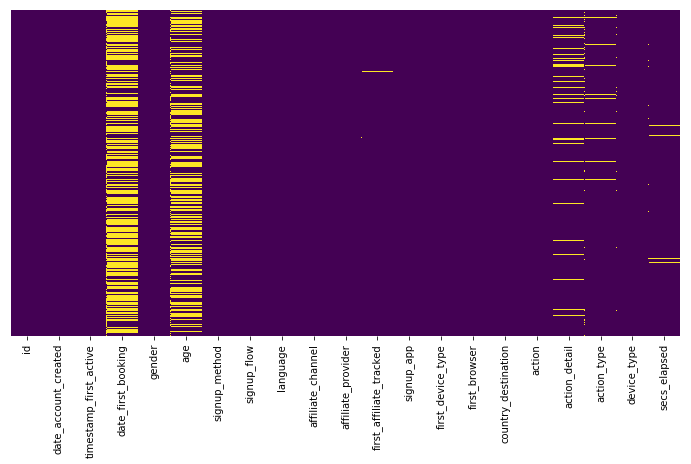

In [98]:
plt.figure(figsize=(12,6))
hm_before = sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# GENDER

In [6]:
df['gender'].unique()

array(['-unknown-', 'MALE', 'FEMALE', 'OTHER'], dtype=object)

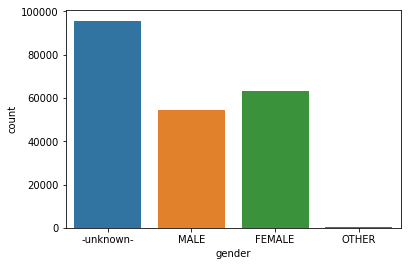

In [7]:
sns.countplot(x='gender',data=df)

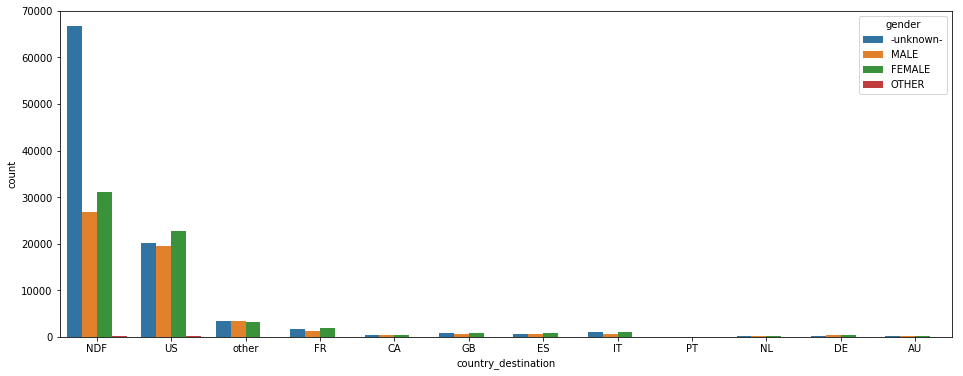

In [8]:
plt.figure(figsize=(16, 6))
sns.countplot(x='country_destination',data=df,hue='gender')

# AGE

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(

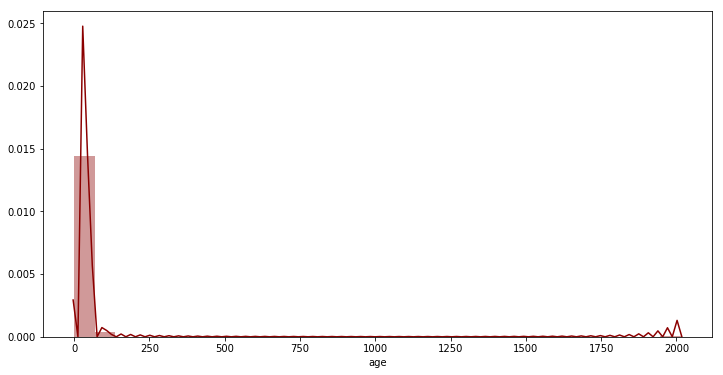

In [99]:
plt.figure(figsize=(12,6))
age_before = sns.distplot(df['age'],bins=30,color='darkred')

In [100]:
df['age'].unique().shape

(116,)

We see 128 unique values for age.

Considering minimum age for booking is 18, then max age in data should be 146 which seems out of place 

In [101]:
print('Max age in dataset',df['age'].max())
print('Min age in dataset',df['age'].min())

Max age in dataset 2014.0
Min age in dataset 1.0


In [102]:
dz = df[df['age']>1000]

In [103]:
dz['age'].unique()

array([2014., 2013., 1927., 1931., 1953., 1942., 1995., 2008., 1928.,
       1924., 1936., 1929., 1949., 1947., 1938., 1926.])

# Cleaning 'Age' Data

In [104]:
df[df['age']>1000].shape[0]

131

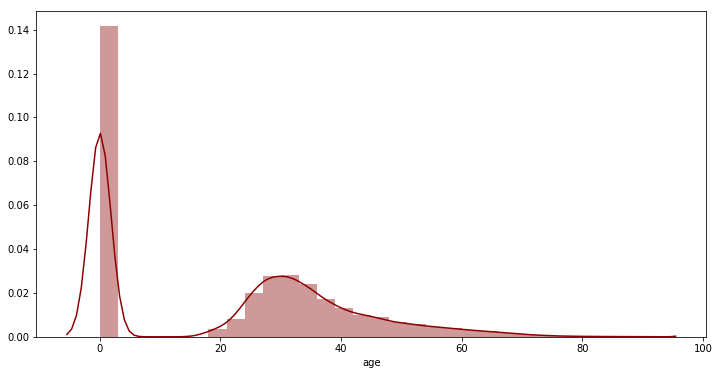

In [255]:
df["age_missing"] = df['age'].isnull()


null = None
df['age_incorrect'] = False

df.loc[df['age']>1000,'age_incorrect'] = True
df.loc[df['age']>1000,'age'] = 2019 - df.loc[df['age']>1000,'age']

df.loc[df['age']> 90,'age_incorrect'] = True
df.loc[df['age']> 90,'age'] = null

df.loc[df['age']< 18,'age_incorrect'] = True
df.loc[df['age']< 18,'age'] = null

df.loc[df['age'].isnull(),'age'] = 0
df.head()

plt.figure(figsize=(12,6))
age_before = sns.distplot(df['age'],bins=30,color='darkred')

In [237]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,first_device_type,first_browser,country_destination,action,action_detail,action_type,device_type,secs_elapsed,age_missing,age_incorrect
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,0.0,facebook,0,en,direct,...,Mac Desktop,Chrome,NDF,NaN,NaN,NaN,NaN,NaN,True,False
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,...,Mac Desktop,Chrome,NDF,NaN,NaN,NaN,NaN,NaN,False,False
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,Windows Desktop,IE,US,NaN,NaN,NaN,NaN,NaN,False,False
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,Mac Desktop,Firefox,other,NaN,NaN,NaN,NaN,NaN,False,False
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,Mac Desktop,Chrome,US,NaN,NaN,NaN,NaN,NaN,False,False


Text(0.5, 1.0, 'Destination Preference vs Age of User')

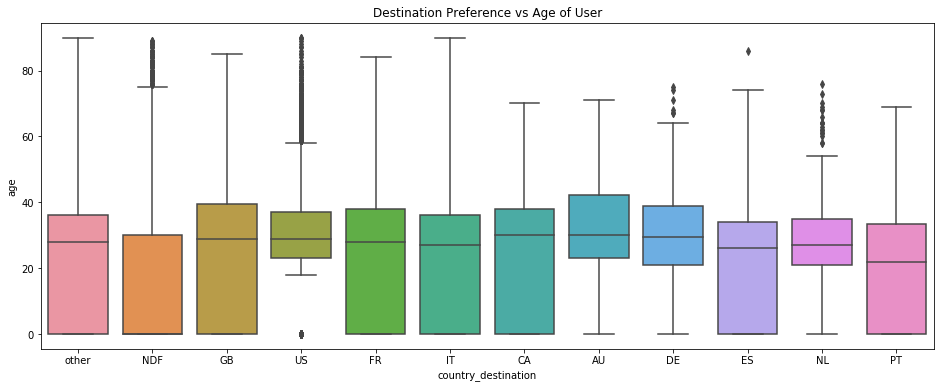

In [107]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='country_destination',y='age',data=df)
plt.title('Destination Preference vs Age of User')

Text(0.5, 1.0, 'Gender vs. Age of Users')

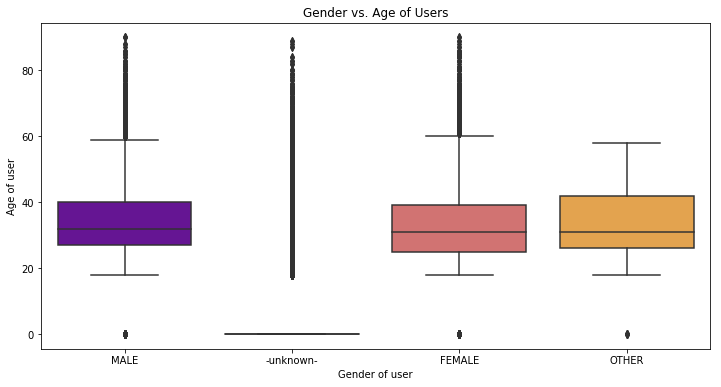

In [108]:
plt.figure(figsize=(12,6))
sns.boxplot(x='gender',y=df['age'].dropna(),data=df,palette='plasma')
plt.ylabel('Age of user')
plt.xlabel('Gender of user')
plt.title('Gender vs. Age of Users')

In [109]:
df.columns

Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination', 'action', 'action_detail',
       'action_type', 'device_type', 'secs_elapsed', 'age_missing',
       'age_incorrect'],
      dtype='object')

Text(0.5, 1.0, 'Signup Method vs. Age of users')

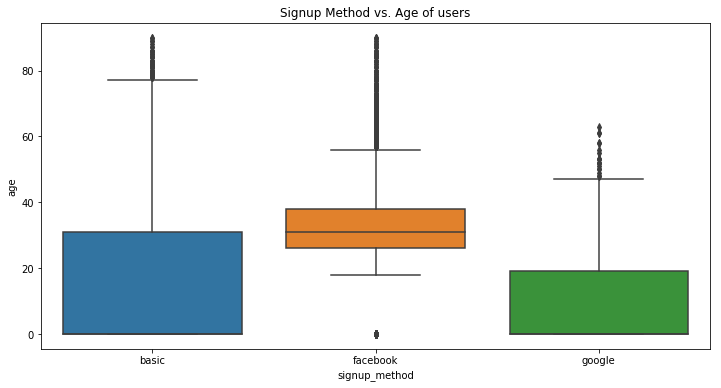

In [110]:
plt.figure(figsize=(12,6))
sns.blend_palette
sns.boxplot(x='signup_method',y=df['age'].dropna(),data=df)
plt.title('Signup Method vs. Age of users')

Text(0.5, 1.0, 'Missing values Heatmap')

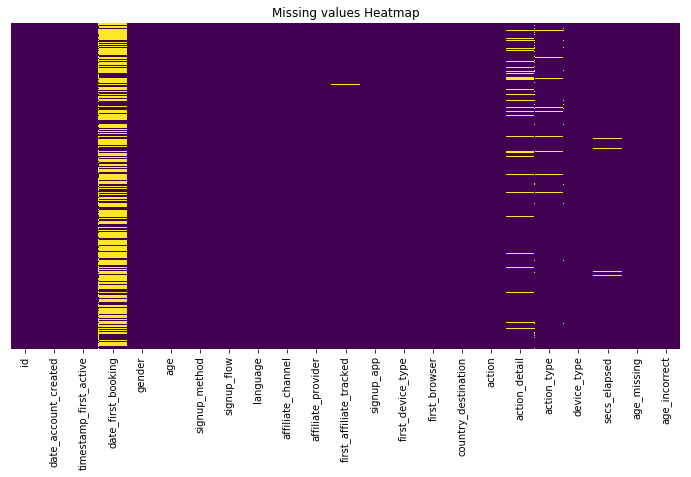

In [111]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing values Heatmap')

In [256]:
df = df.drop(columns=['date_first_booking'])
df.describe()
df.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
action                      object
action_detail               object
action_type                 object
device_type                 object
secs_elapsed               float64
age_missing                   bool
age_incorrect                 bool
dtype: object

In [257]:
df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
gender                          0
age                             0
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
action                     139868
action_detail              147319
action_type                141945
device_type                139636
secs_elapsed               140820
age_missing                     0
age_incorrect                   0
dtype: int64

In [258]:
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,first_device_type,first_browser,country_destination,action,action_detail,action_type,device_type,secs_elapsed,age_missing,age_incorrect
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,0.0,facebook,0,en,direct,direct,...,Mac Desktop,Chrome,NDF,NaN,NaN,NaN,NaN,NaN,True,False
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,...,Mac Desktop,Chrome,NDF,NaN,NaN,NaN,NaN,NaN,False,False
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,...,Windows Desktop,IE,US,NaN,NaN,NaN,NaN,NaN,False,False
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,...,Mac Desktop,Firefox,other,NaN,NaN,NaN,NaN,NaN,False,False
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,...,Mac Desktop,Chrome,US,NaN,NaN,NaN,NaN,NaN,False,False


In [259]:
df['date_account_created_day'] = pd.DatetimeIndex(df['date_account_created']).day
df['date_account_created_month'] = pd.DatetimeIndex(df['date_account_created']).month
df['date_account_created_year'] = pd.DatetimeIndex(df['date_account_created']).year
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,action,action_detail,action_type,device_type,secs_elapsed,age_missing,age_incorrect,date_account_created_day,date_account_created_month,date_account_created_year
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,0.0,facebook,0,en,direct,direct,...,NaN,NaN,NaN,NaN,NaN,True,False,28,6,2010
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,...,NaN,NaN,NaN,NaN,NaN,False,False,25,5,2011
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,...,NaN,NaN,NaN,NaN,NaN,False,False,28,9,2010
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,...,NaN,NaN,NaN,NaN,NaN,False,False,5,12,2011
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,...,NaN,NaN,NaN,NaN,NaN,False,False,14,9,2010


In [260]:
df['timestamp_first_active']= df['timestamp_first_active'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H%M%S'))
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,action,action_detail,action_type,device_type,secs_elapsed,age_missing,age_incorrect,date_account_created_day,date_account_created_month,date_account_created_year
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,0.0,facebook,0,en,direct,direct,...,NaN,NaN,NaN,NaN,NaN,True,False,28,6,2010
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,...,NaN,NaN,NaN,NaN,NaN,False,False,25,5,2011
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,...,NaN,NaN,NaN,NaN,NaN,False,False,28,9,2010
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,...,NaN,NaN,NaN,NaN,NaN,False,False,5,12,2011
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,en,direct,direct,...,NaN,NaN,NaN,NaN,NaN,False,False,14,9,2010


In [261]:
df['first_active_to_account_created'] = (pd.to_datetime(df['date_account_created']) - pd.to_datetime(df['timestamp_first_active'].dt.date))/np.timedelta64(1, 'D')

df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,action_detail,action_type,device_type,secs_elapsed,age_missing,age_incorrect,date_account_created_day,date_account_created_month,date_account_created_year,first_active_to_account_created
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,0.0,facebook,0,en,direct,direct,...,NaN,NaN,NaN,NaN,True,False,28,6,2010,466.0
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,...,NaN,NaN,NaN,NaN,False,False,25,5,2011,732.0
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,...,NaN,NaN,NaN,NaN,False,False,28,9,2010,476.0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,...,NaN,NaN,NaN,NaN,False,False,5,12,2011,765.0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,en,direct,direct,...,NaN,NaN,NaN,NaN,False,False,14,9,2010,280.0


In [262]:
df["first_affiliate_tracked_missing"] = df['first_affiliate_tracked'].isnull()
df.loc[df['first_affiliate_tracked'].isnull(),'first_affiliate_tracked'] = '0'
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,action_type,device_type,secs_elapsed,age_missing,age_incorrect,date_account_created_day,date_account_created_month,date_account_created_year,first_active_to_account_created,first_affiliate_tracked_missing
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,0.0,facebook,0,en,direct,direct,...,NaN,NaN,NaN,True,False,28,6,2010,466.0,False
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,...,NaN,NaN,NaN,False,False,25,5,2011,732.0,False
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,...,NaN,NaN,NaN,False,False,28,9,2010,476.0,False
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,...,NaN,NaN,NaN,False,False,5,12,2011,765.0,False
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,en,direct,direct,...,NaN,NaN,NaN,False,False,14,9,2010,280.0,False


In [246]:
df.isnull().sum()

id                                      0
date_account_created                    0
timestamp_first_active                  0
gender                                  0
age                                     0
signup_method                           0
signup_flow                             0
language                                0
affiliate_channel                       0
affiliate_provider                      0
first_affiliate_tracked                 0
signup_app                              0
first_device_type                       0
first_browser                           0
country_destination                     0
action                             139868
action_detail                      147319
action_type                        141945
device_type                        139636
secs_elapsed                       140820
age_missing                             0
age_incorrect                           0
date_account_created_day                0
date_account_created_month        

In [263]:
classes, class_cnts = np.unique(list(df["action"]), return_counts=True)
print (classes, class_cnts)
df["action_missing"] = df['action'].isnull()
df.loc[df['action'].isnull(),'action'] = 'EMPTY'
df.head()


['0.0' '10' '11' '12' 'about_us' 'account' 'active' 'agree_terms_check'
 'airbnb_picks' 'ajax_check_dates' 'ajax_get_referrals_amt'
 'ajax_google_translate' 'ajax_google_translate_description'
 'ajax_image_upload' 'ajax_lwlb_contact' 'ajax_photo_widget_form_iframe'
 'ajax_price_and_availability' 'ajax_referral_banner_experiment_type'
 'ajax_referral_banner_type' 'ajax_refresh_subtotal' 'ajax_statsd'
 'ajax_worth' 'apply' 'apply_code' 'apply_coupon_click'
 'apply_reservation' 'ask_question' 'at_checkpoint' 'authenticate'
 'authorize' 'available' 'badge' 'calendar_tab_inner2' 'callback'
 'campaigns' 'cancellation_policies' 'cancellation_policy_click' 'change'
 'change_currency' 'click' 'clickthrough' 'collections' 'complete_status'
 'concierge' 'confirm_email' 'confirmation' 'connect' 'contact_new'
 'coupon_code_click' 'coupon_field_focus' 'create' 'create_multiple'
 'dashboard' 'decision_tree' 'department' 'edit' 'edit_verification'
 'endpoint_error' 'facebook_auto_login' 'faq' 'faq_cat

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,device_type,secs_elapsed,age_missing,age_incorrect,date_account_created_day,date_account_created_month,date_account_created_year,first_active_to_account_created,first_affiliate_tracked_missing,action_missing
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,0.0,facebook,0,en,direct,direct,...,NaN,NaN,True,False,28,6,2010,466.0,False,True
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,...,NaN,NaN,False,False,25,5,2011,732.0,False,True
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,...,NaN,NaN,False,False,28,9,2010,476.0,False,True
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,...,NaN,NaN,False,False,5,12,2011,765.0,False,True
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,en,direct,direct,...,NaN,NaN,False,False,14,9,2010,280.0,False,True


In [264]:
classes, class_cnts = np.unique(list(df["action_detail"]), return_counts=True)
print (classes, class_cnts)
df["action_detail_missing"] = df['action_detail'].isnull()
df.loc[df['action_detail'].isnull(),'action_detail'] = 'EMPTY'
df.head()

['-unknown-' '0.0' 'account_notification_settings'
 'account_payout_preferences' 'account_privacy_settings'
 'airbnb_picks_wishlists' 'alteration_field' 'apply_coupon'
 'apply_coupon_click' 'at_checkpoint' 'book_it' 'cancellation_policies'
 'cancellation_policy_click' 'change_contact_host_dates' 'change_or_alter'
 'change_trip_characteristics' 'complete_booking' 'confirm_email_link'
 'contact_host' 'coupon_code_click' 'coupon_field_focus' 'create_listing'
 'create_phone_numbers' 'create_user' 'dashboard' 'edit_profile'
 'forgot_password' 'guest_itinerary' 'guest_receipt' 'header_userpic'
 'host_home' 'instant_book' 'list_your_space' 'listing_descriptions'
 'listing_recommendations' 'listing_reviews' 'listing_reviews_page'
 'login' 'login_modal' 'login_page' 'manage_listing' 'message_inbox'
 'message_post' 'message_thread' 'message_to_host_change'
 'message_to_host_focus' 'nan' 'notifications' 'oauth_response' 'p1' 'p3'
 'p4' 'p5' 'payment_instruments' 'pending' 'previous_trips'
 'profi

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,secs_elapsed,age_missing,age_incorrect,date_account_created_day,date_account_created_month,date_account_created_year,first_active_to_account_created,first_affiliate_tracked_missing,action_missing,action_detail_missing
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,0.0,facebook,0,en,direct,direct,...,NaN,True,False,28,6,2010,466.0,False,True,True
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,...,NaN,False,False,25,5,2011,732.0,False,True,True
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,...,NaN,False,False,28,9,2010,476.0,False,True,True
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,...,NaN,False,False,5,12,2011,765.0,False,True,True
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,en,direct,direct,...,NaN,False,False,14,9,2010,280.0,False,True,True


In [265]:
classes, class_cnts = np.unique(list(df["action_type"]), return_counts=True)
print (classes, class_cnts)

df["action_type_missing"] = df['action_type'].isnull()
df.loc[df['action_type'].isnull(),'action_type'] = 'EMPTY'
df.head()


['-unknown-' '0.0' 'booking_request' 'click' 'data' 'message_post' 'nan'
 'partner_callback' 'submit' 'view'] [  9477      3    104  13247  14394    924 141945     14   4956  28387]


,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,age_missing,age_incorrect,date_account_created_day,date_account_created_month,date_account_created_year,first_active_to_account_created,first_affiliate_tracked_missing,action_missing,action_detail_missing,action_type_missing
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,0.0,facebook,0,en,direct,direct,...,True,False,28,6,2010,466.0,False,True,True,True
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,...,False,False,25,5,2011,732.0,False,True,True,True
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,...,False,False,28,9,2010,476.0,False,True,True,True
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,...,False,False,5,12,2011,765.0,False,True,True,True
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,en,direct,direct,...,False,False,14,9,2010,280.0,False,True,True,True


In [270]:
classes, class_cnts = np.unique(list(df["device_type"]), return_counts=True)
print (classes, class_cnts)

df["device_type_missing"] = df['device_type'].isnull()
df.loc[df['device_type'].isnull(),'device_type'] = 'EMPTY'
df.head()


['-unknown-' 'Android App Unknown Phone/Tablet' 'Android Phone'
 'Blackberry' 'Chromebook' 'Linux Desktop' 'Mac Desktop' 'Tablet'
 'Windows Desktop' 'Windows Phone' 'iPad Tablet' 'iPhone' 'iPodtouch'
 'nan'] [  3586   2563   1652      7    219    267  27370    659  22861      6
   5123   9466     36 139636]


,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,date_account_created_day,date_account_created_month,date_account_created_year,first_active_to_account_created,first_affiliate_tracked_missing,action_missing,action_detail_missing,action_type_missing,secs_elapsed_missing,device_type_missing
0,-unknown-,0.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,28,6,2010,466.0,False,True,True,True,True,True
1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,...,25,5,2011,732.0,False,True,True,True,True,True
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,...,28,9,2010,476.0,False,True,True,True,True,True
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,...,5,12,2011,765.0,False,True,True,True,True,True
4,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,...,14,9,2010,280.0,False,True,True,True,True,True


In [266]:
df["secs_elapsed_missing"] = df['secs_elapsed'].isnull()
df.loc[df['secs_elapsed'].isnull(),'secs_elapsed'] = '0'
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,age_incorrect,date_account_created_day,date_account_created_month,date_account_created_year,first_active_to_account_created,first_affiliate_tracked_missing,action_missing,action_detail_missing,action_type_missing,secs_elapsed_missing
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-unknown-,0.0,facebook,0,en,direct,direct,...,False,28,6,2010,466.0,False,True,True,True,True
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,MALE,38.0,facebook,0,en,seo,google,...,False,25,5,2011,732.0,False,True,True,True,True
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,FEMALE,56.0,basic,3,en,direct,direct,...,False,28,9,2010,476.0,False,True,True,True,True
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,FEMALE,42.0,facebook,0,en,direct,direct,...,False,5,12,2011,765.0,False,True,True,True,True
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,-unknown-,41.0,basic,0,en,direct,direct,...,False,14,9,2010,280.0,False,True,True,True,True


In [283]:
df['secs_elapsed'] = df['secs_elapsed'].apply(float)

In [284]:
df.dtypes

gender                              object
age                                float64
signup_method                       object
signup_flow                          int64
language                            object
affiliate_channel                   object
affiliate_provider                  object
first_affiliate_tracked             object
signup_app                          object
first_device_type                   object
first_browser                       object
country_destination                 object
action                              object
action_detail                       object
action_type                         object
device_type                         object
secs_elapsed                       float64
age_missing                           bool
age_incorrect                         bool
date_account_created_day             int64
date_account_created_month           int64
date_account_created_year            int64
first_active_to_account_created    float64
first_affil

In [268]:
df = df.drop(columns=['id','date_account_created', 'timestamp_first_active'])


gender                                  0
age                                     0
signup_method                           0
signup_flow                             0
language                                0
affiliate_channel                       0
affiliate_provider                      0
first_affiliate_tracked                 0
signup_app                              0
first_device_type                       0
first_browser                           0
country_destination                     0
action                                  0
action_detail                           0
action_type                             0
device_type                        139636
secs_elapsed                            0
age_missing                             0
age_incorrect                           0
date_account_created_day                0
date_account_created_month              0
date_account_created_year               0
first_active_to_account_created         0
first_affiliate_tracked_missing   

In [271]:
df.isnull().sum()

gender                             0
age                                0
signup_method                      0
signup_flow                        0
language                           0
affiliate_channel                  0
affiliate_provider                 0
first_affiliate_tracked            0
signup_app                         0
first_device_type                  0
first_browser                      0
country_destination                0
action                             0
action_detail                      0
action_type                        0
device_type                        0
secs_elapsed                       0
age_missing                        0
age_incorrect                      0
date_account_created_day           0
date_account_created_month         0
date_account_created_year          0
first_active_to_account_created    0
first_affiliate_tracked_missing    0
action_missing                     0
action_detail_missing              0
action_type_missing                0
s

In [275]:
df.dtypes

gender                              object
age                                float64
signup_method                       object
signup_flow                          int64
language                            object
affiliate_channel                   object
affiliate_provider                  object
first_affiliate_tracked             object
signup_app                          object
first_device_type                   object
first_browser                       object
country_destination                 object
action                              object
action_detail                       object
action_type                         object
device_type                         object
secs_elapsed                        object
age_missing                           bool
age_incorrect                         bool
date_account_created_day             int64
date_account_created_month           int64
date_account_created_year            int64
first_active_to_account_created    float64
first_affil

In [272]:
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
le.fit(df['country_destination'])
le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])


array(['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NDF', 'NL', 'PT', 'US',
       'other'], dtype=object)

In [273]:
df.columns

Index(['gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'country_destination', 'action', 'action_detail', 'action_type',
       'device_type', 'secs_elapsed', 'age_missing', 'age_incorrect',
       'date_account_created_day', 'date_account_created_month',
       'date_account_created_year', 'first_active_to_account_created',
       'first_affiliate_tracked_missing', 'action_missing',
       'action_detail_missing', 'action_type_missing', 'secs_elapsed_missing',
       'device_type_missing'],
      dtype='object')

In [285]:
categorical_cols = ['gender',
                    'signup_method',
                    'language',
                    'affiliate_channel',
                    'affiliate_provider',
                    'first_affiliate_tracked',
                    'signup_app',
                    'first_device_type',
                    'first_browser',
                    'country_destination',
                    'action',
                    'action_detail',
                    'action_type',
                    'device_type',
                    'age_missing',
                    'age_incorrect',
                    'first_affiliate_tracked_missing',
                    'action_missing',
                    'action_detail_missing',
                    'action_type_missing',
                    'secs_elapsed_missing',
                    'device_type_missing']


# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))
df[categorical_cols].head(10)

,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,...,action_type,device_type,age_missing,age_incorrect,first_affiliate_tracked_missing,action_missing,action_detail_missing,action_type_missing,secs_elapsed_missing,device_type_missing
0,0,1,5,2,4,7,2,3,8,7,...,2,5,1,0,0,1,1,1,1,1
1,2,1,5,7,8,7,2,3,8,7,...,2,5,0,0,0,1,1,1,1,1
2,1,0,5,2,4,7,2,6,21,10,...,2,5,0,0,0,1,1,1,1,1
3,1,1,5,2,4,7,2,3,17,11,...,2,5,0,0,0,1,1,1,1,1
4,0,0,5,2,4,7,2,3,8,10,...,2,5,0,0,0,1,1,1,1,1
5,0,0,5,3,12,4,2,3,8,10,...,2,5,1,0,0,1,1,1,1,1
6,1,0,5,3,2,7,2,3,41,10,...,2,5,0,0,0,1,1,1,1,1
7,1,0,5,2,4,4,2,3,41,10,...,2,5,0,0,0,1,1,1,1,1
8,1,0,5,3,2,7,2,3,41,10,...,2,5,0,0,0,1,1,1,1,1
9,0,0,5,3,2,4,2,3,17,10,...,2,5,0,0,0,1,1,1,1,1


In [286]:
X = df.loc[:, df.columns != 'country_destination']
y = df['country_destination']


In [318]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=5, shuffle=True)

In [319]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=18)

Trial: 1


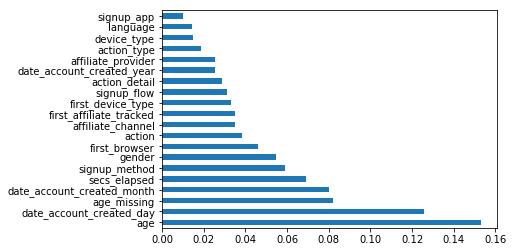

[[    0     0     0     0     0     0     0    44     0     0    57     0]
 [    0     0     0     0     0     0     0   145     0     0   132     0]
 [    0     0     0     0     0     0     0   107     0     0    99     0]
 [    0     0     0     0     0     0     0   274     0     0   194     0]
 [    0     0     0     0     0     0     0   513     0     0   504     0]
 [    0     0     0     0     0     0     0   247     0     0   237     0]
 [    0     0     0     0     0     0     0   341     0     0   265     0]
 [    0     0     0     0     3     0     2 21107     0     0  3816     2]
 [    0     0     0     0     0     0     0    82     0     0    73     0]
 [    0     0     0     0     0     0     0    17     0     0    20     0]
 [    0     1     1     0     1     0     1  6137     0     0  6245     2]
 [    0     0     0     0     1     0     0  1086     0     1   933     1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00 

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Trial: 2


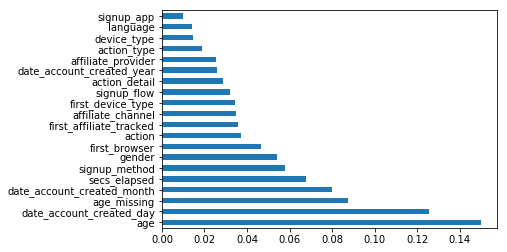

[[    0     0     0     0     1     0     0    45     0     0    65     0]
 [    0     0     0     0     0     0     0   147     0     0   152     0]
 [    0     0     0     0     0     0     0   120     0     0   102     0]
 [    0     0     0     0     0     0     0   229     0     0   211     0]
 [    0     0     0     0     0     0     0   561     0     0   449     2]
 [    0     0     0     0     0     0     0   237     0     0   240     0]
 [    0     0     0     0     0     0     0   296     0     0   271     0]
 [    0     0     1     0     2     2     1 21110     0     0  3707     5]
 [    0     0     0     0     0     0     0    87     0     0    74     0]
 [    0     0     0     0     0     0     0    21     0     0    14     0]
 [    0     0     0     1     1     0     2  6361     0     1  6159     3]
 [    0     0     0     0     1     0     0  1089     0     0   920     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00 

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Trial: 3


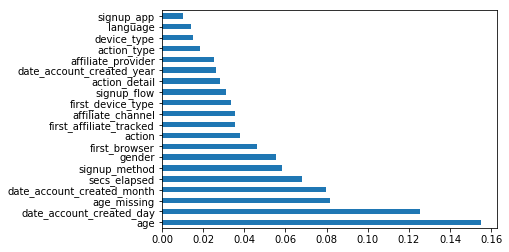

[[    0     0     0     0     0     0     0    53     0     0    61     0]
 [    0     0     0     0     0     0     0   119     0     0   148     0]
 [    0     0     0     0     0     0     0   119     0     0    92     0]
 [    0     0     0     0     0     0     0   236     0     0   214     0]
 [    0     0     0     0     0     0     0   501     0     0   477     0]
 [    0     0     0     0     0     0     0   232     0     0   207     1]
 [    0     0     0     0     0     0     0   286     0     0   258     0]
 [    0     1     0     2     5     0     0 21312     0     0  3678     2]
 [    0     0     0     0     0     0     0    68     0     0    64     0]
 [    0     0     0     0     0     0     0    30     0     0    28     1]
 [    0     1     0     0     4     1     0  6275     0     0  6242     4]
 [    0     0     0     0     0     0     0  1020     0     0   948     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00 

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Trial: 4


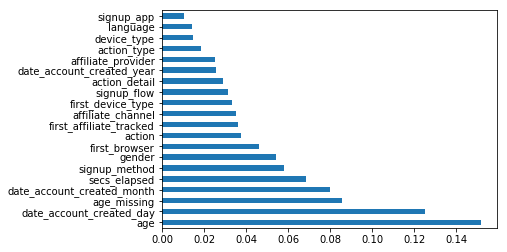

[[    0     0     0     0     0     0     0    51     0     0    48     0]
 [    1     0     0     0     0     0     0   136     0     0   156     1]
 [    0     0     0     0     0     0     0   108     0     0   107     0]
 [    0     0     0     0     0     0     0   214     0     0   209     0]
 [    0     1     0     2     0     0     0   546     0     0   471     1]
 [    0     0     0     0     0     0     0   218     0     0   208     0]
 [    0     0     0     0     0     0     0   301     0     0   262     0]
 [    0     1     0     1     1     2     1 21067     0     0  3690     3]
 [    0     0     0     1     0     0     0    73     0     0    82     0]
 [    0     0     0     0     0     0     0    23     0     0    19     1]
 [    0     0     0     4     2     1     0  6252     0     0  6364     7]
 [    0     0     0     0     0     0     0  1058     0     0   996     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00 

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Trial: 5


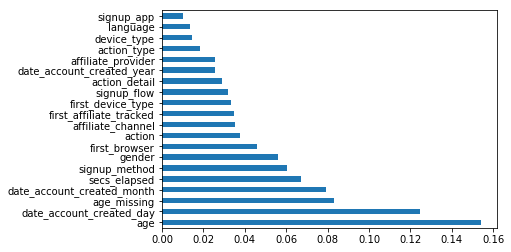

[[    0     1     0     0     0     0     0    56     0     0    56     1]
 [    0     0     0     0     1     0     0   150     0     0   140     0]
 [    0     0     0     0     0     0     0   105     0     0   102     0]
 [    0     0     0     0     0     0     0   255     0     0   213     0]
 [    0     0     0     0     0     0     0   513     0     0   482     0]
 [    0     0     0     0     0     0     0   249     0     0   248     0]
 [    0     0     0     0     0     0     0   298     0     0   257     0]
 [    0     0     1     1     6     1     1 21133     0     0  3874     2]
 [    0     0     0     0     0     0     0    77     0     0    81     0]
 [    0     0     0     0     0     0     0    27     0     0    16     0]
 [    0     0     1     0     1     1     0  6145     0     0  6153     2]
 [    0     0     1     0     1     0     0  1084     0     0   953     1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00 

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [320]:
from sklearn.ensemble import RandomForestClassifier
accuracy_scores = []
ndcg_scores = []
classifier = RandomForestClassifier(n_estimators=200, random_state=7, max_depth = 20)
cnt = 1
for train, test in kf.split(X):
    print ("Trial:", cnt )
    classifier.fit(X.iloc[train], y.iloc[train])
    
    feat_importances = pd.Series(classifier.feature_importances_, index=X.iloc[train].columns)
    feat_importances.nlargest(20).plot(kind='barh')
    plt.show()
    
    y_pred = classifier.predict(X.iloc[test])
    y_pred_prob = classifier.predict_proba(X.iloc[test])
    
    
    print(confusion_matrix(y.iloc[test],y_pred))
    print(classification_report(y.iloc[test],y_pred))
    print(accuracy_score(y.iloc[test], y_pred))
    
    accuracy_scores.append(accuracy_score(y.iloc[test], y_pred)) 
    
    ndcg_scorer = ndcg_score(y.iloc[test], y_pred_prob, k=5)
    
    ndcg_scores.append(ndcg_scorer)
        
    cnt = cnt + 1
    
    
    
    

In [321]:
print (np.mean(accuracy_scores))

0.6413368905105337


In [322]:
print(np.mean(ndcg_scores))

0.8261894756271968


In [304]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import make_scorer


def dcg_score(y_true, y_score, k=5):

    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)


def ndcg_score(ground_truth, predictions, k=5):

    lb = LabelBinarizer()
    lb.fit(range(len(predictions) + 1))
    T = lb.transform(ground_truth)
    scores = []

    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)
    return np.mean(scores)


# NDCG Scorer function
ndcg_scorer = ndcg_score(y_test, y_pred_prob, k=5)


In [305]:
ndcg_scorer

0.8257009411449551